In [2]:
import pandas as pd


df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env_final_v8.csv")
print(f"Num rows: {len(df)}")
df.head()

Num rows: 1063947


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
0,4724.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0
1,4709.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.007874,35.925000,-115.117000,2.822266,265.75,277.25,...,18.129263,17.823468,9.114583,0.0,1.659570,5.281450,3.429616,3280.064761,249.988458,0.0
2,4564.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,35.305114,21.909930,8.794788,0.0,2.739051,6.916189,3.836471,2990.476711,259.677833,0.0
3,4779.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,30.685404,18.030886,8.794788,0.0,2.890112,7.008753,3.871680,3020.788279,288.870042,0.0
4,4724.0,2021-01-23 23:14:00+00:00,2021-01-24 00:14:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0


In [3]:
at_least_one_pos_precip_mask = (df['gauge_acc_in'] >= 0.04) | (df['mrms_q3evap_qpe'] >= 0.04)
df_non_zero = df[at_least_one_pos_precip_mask]

print(f"# Data points  : {len(df)}")
print(f"# Unique gauges: {len(set(df['gauge_idx']))}")
print("---------------------------------------------------------")
print(f"# Data points   w/ 1+ value >= 0.04: {len(df_non_zero)}")
print(f"# Unique gauges w/ 1+ value >= 0.04: {len(set(df_non_zero['gauge_idx']))}")

# Data points  : 1063947
# Unique gauges: 220
---------------------------------------------------------
# Data points   w/ 1+ value >= 0.04: 385998
# Unique gauges w/ 1+ value >= 0.04: 220


In [4]:
# df_non_zero["day"] = df_non_zero["start_datetime_utc"].apply(lambda s: s.split(" ")[0])

In [5]:
# df_non_zero[["day", "gauge_idx", "gauge_acc_in", "mrms_q3evap_qpe", "lat", "lon", "DCAPE"]].groupby("day")

In [6]:
# set(df_non_zero["day"]).__len__()

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt


mrms_bias = np.array(df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])
random.seed(42)
random.shuffle(mrms_bias)

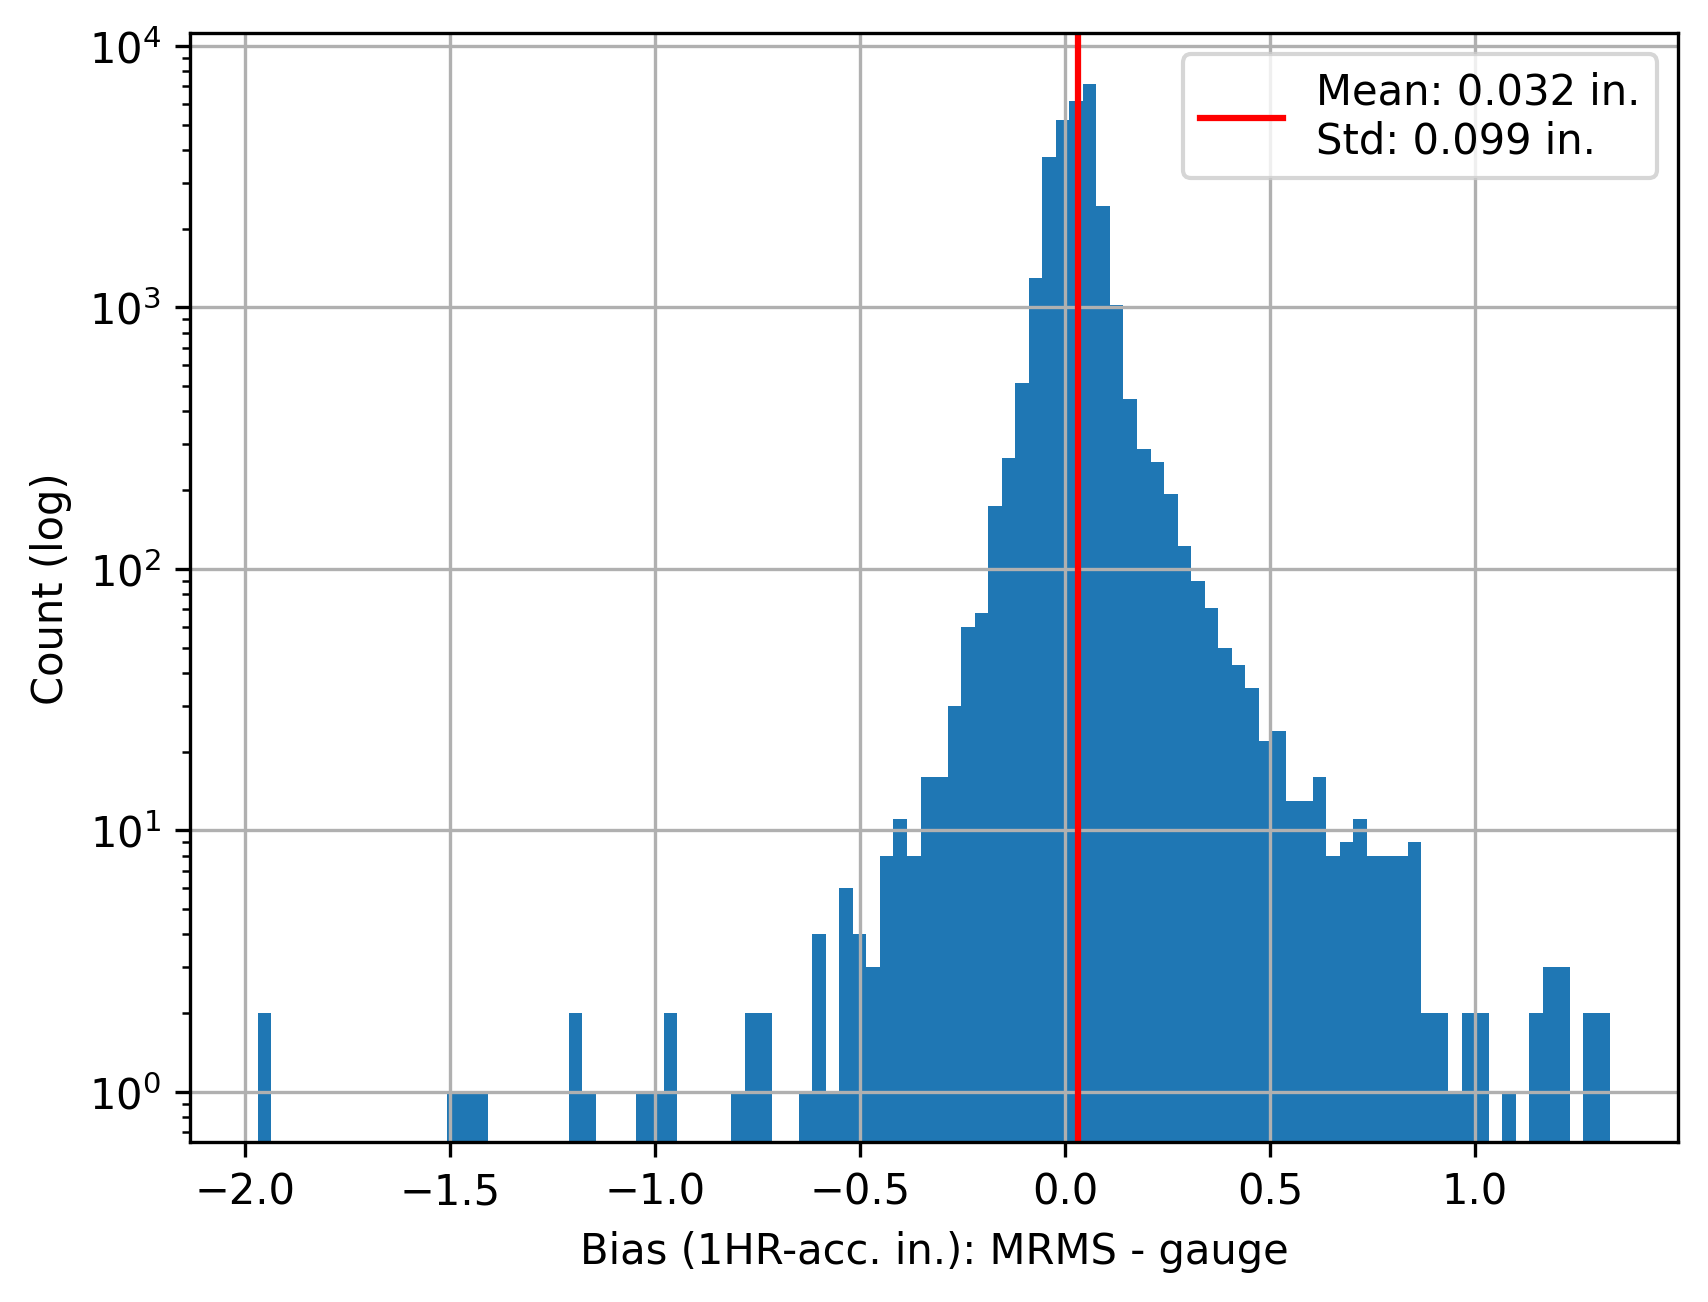

In [8]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming mrms_bias is already defined in your environment
# Example data for demonstration:
# mrms_bias = np.random.randn(50000)

fig, ax = plt.subplots(dpi=300)
arr = mrms_bias[:30000]

ax.hist(mrms_bias[:30000], bins=100, log=True)
ax.axvline(np.mean(arr), color='red', linestyle='-', label=f'Mean: {arr.mean():.3f} in.\nStd: {arr.std():.3f} in.')
ax.set_xlabel("Bias (1HR-acc. in.): MRMS - gauge")
ax.set_ylabel("Count (log)")
ax.grid()
ax.legend()
plt.show()

# Bias Regimes
***
- $\beta = R_{\text{mrms}} - R$

- Extreme underestimation (--)
    - $ \beta \le -0.5$
- Underestimation (-)
    - $ -0.5 \lt \beta \le -0.1 $
- No bias (*)
    - $ -0.1 \lt \beta  \le 0.1 $
- Overestimation (+)
    - $ 0.1 \lt \beta \le 0.5  $
- Extreme overestimation (++)
    - $ 0.5 \lt \beta $


In [9]:
bias = df_non_zero['mrms_q3evap_qpe'] - df_non_zero['gauge_acc_in']

df_non_zero['mrms_bias_category'] = pd.cut(
    bias,
    bins=[-np.inf, -0.5, -0.10, 0.10, 0.5, np.inf],
    labels=[
        "extreme_underestimation",
        "underestimation",
        "no_bias",
        "overestimation",
        "extreme_overestimation"
    ]
)

/tmp/ipykernel_1532735/1099256209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['mrms_bias_category'] = pd.cut(


In [10]:
df_non_zero.groupby("mrms_bias_category").count()

/tmp/ipykernel_1532735/1398131809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_non_zero.groupby("mrms_bias_category").count()


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
mrms_bias_category,,,,,,,,,,,,,,,,,,,,,
extreme_underestimation,519,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519
underestimation,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,...,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482
no_bias,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735,...,331735,331735,331735,331735,331735,331735,331735,331735,331735,331735
overestimation,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169,...,39169,39169,39169,39169,39169,39169,39169,39169,39169,39169
extreme_overestimation,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,...,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093


In [11]:
import numpy as np

columns  = list(df.columns)
features = columns[7: -1]
ccs = []

for feat in features:
    X = df[feat]
    y = df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    # y = df["gauge_acc_in"] # df['mrms_q3evap_qpe'] - df['gauge_acc_in']
    print(f"{feat}: {np.corrcoef(X, y)[0, 1]:.3f}")
    ccs.append((feat, np.corrcoef(X, y)[0, 1]))

700mb_UGRD: -0.051
850mb_DPT: 0.103
850mb_TMP: 0.146
850mb_HGT: 0.018
2m_above_ground_TMP: 0.153
925mb_DPT: 0.090
entire_atmosphere_single_layer_PWAT: 0.002
500mb_TMP: 0.119
700mb_DPT: 0.126
700mb_TMP: 0.134
500mb_DPT: 0.100
700mb_HGT: -0.002
850mb_UGRD: -0.039
700mb_VGRD: -0.028
highest_tropospheric_freezing_level_HGT: 0.092
surface_PRES: -0.012
level_of_adiabatic_condensation_from_sfc_HGT: 0.065
850mb_VGRD: -0.015
2m_above_ground_DPT: 0.075
surface_theta_e: 0.155
lowest_100mb_mean_mixing_ratio: 0.077
925mb_700mb_DPT: 0.112
850mb_700mb_DPT: 0.117
850mb_500mb_DPT: 0.119
LCL_LFC_RH: 0.051
0-3km_RH: -0.018
0-5km_RH: 0.040
low_level_lapse_rate: 0.087
3hr_lapse_rate_change: 0.002
sfc_850_pw: 0.051
sfc_700_pw: 0.087
850_700_mean_wind: -0.044
LCL_height: 0.138
DCAPE: 0.152


In [12]:
ccs = sorted(ccs, key=lambda x:x[1])

In [13]:
ccs.__len__()

34

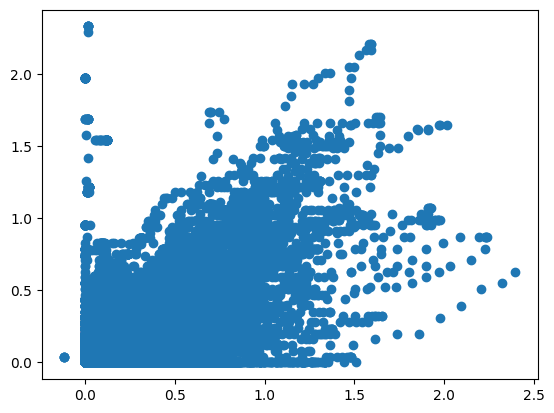

In [14]:
x = df["mrms_q3evap_qpe"]
y = df["gauge_acc_in"]
plt.scatter(x, y);

In [15]:
ccs[::-1]

[('surface_theta_e', np.float64(0.15544156930217065)),
 ('2m_above_ground_TMP', np.float64(0.15338598303344916)),
 ('DCAPE', np.float64(0.15212748085587263)),
 ('850mb_TMP', np.float64(0.14644397006281007)),
 ('LCL_height', np.float64(0.1381024492425778)),
 ('700mb_TMP', np.float64(0.1336987584758356)),
 ('700mb_DPT', np.float64(0.12617700845562121)),
 ('500mb_TMP', np.float64(0.11920537884834692)),
 ('850mb_500mb_DPT', np.float64(0.11851737383832944)),
 ('850mb_700mb_DPT', np.float64(0.11722395067036095)),
 ('925mb_700mb_DPT', np.float64(0.11170709660029994)),
 ('850mb_DPT', np.float64(0.10329605435874249)),
 ('500mb_DPT', np.float64(0.09999692403880835)),
 ('highest_tropospheric_freezing_level_HGT', np.float64(0.09227899438058347)),
 ('925mb_DPT', np.float64(0.08969550217962662)),
 ('low_level_lapse_rate', np.float64(0.08690439388248011)),
 ('sfc_700_pw', np.float64(0.0866531801369826)),
 ('lowest_100mb_mean_mixing_ratio', np.float64(0.07662573229488985)),
 ('2m_above_ground_DPT', np

In [16]:
for i in range(10):
    cat, val = ccs[i]
    print(f"{cat}: {val:.3f}")

700mb_UGRD: -0.051
850_700_mean_wind: -0.044
850mb_UGRD: -0.039
700mb_VGRD: -0.028
0-3km_RH: -0.018
850mb_VGRD: -0.015
surface_PRES: -0.012
700mb_HGT: -0.002
entire_atmosphere_single_layer_PWAT: 0.002
3hr_lapse_rate_change: 0.002


In [17]:
import sklearn as skl
from sklearn.linear_model import LinearRegression


X = np.array([
    df_non_zero["surface_theta_e"],
    df_non_zero["2m_above_ground_TMP"],
    df_non_zero["DCAPE"],
    df_non_zero["850mb_TMP"],
    df_non_zero["LCL_height"],
    df_non_zero["700mb_TMP"],
    df_non_zero["700mb_DPT"],
    df_non_zero["500mb_TMP"],
    df_non_zero["850mb_500mb_DPT"],
    df_non_zero["850mb_700mb_DPT"],
    df_non_zero["925mb_700mb_DPT"],
    df_non_zero["850mb_DPT"],
    df_non_zero["500mb_DPT"],
    df_non_zero["highest_tropospheric_freezing_level_HGT"],
    df_non_zero["925mb_DPT"],
    df_non_zero["low_level_lapse_rate"],
    df_non_zero["sfc_700_pw"],
    df_non_zero["lowest_100mb_mean_mixing_ratio"],
    df_non_zero["2m_above_ground_DPT"],
    df_non_zero["level_of_adiabatic_condensation_from_sfc_HGT"],
    df_non_zero["sfc_850_pw"],
    df_non_zero["LCL_LFC_RH"],
    df_non_zero["0-5km_RH"],
    df_non_zero["850mb_HGT"],
    df_non_zero["3hr_lapse_rate_change"],
    df_non_zero["entire_atmosphere_single_layer_PWAT"],
    df_non_zero["700mb_HGT"],
    df_non_zero["surface_PRES"],
    df_non_zero["850mb_VGRD"],
    df_non_zero["0-3km_RH"],
    df_non_zero["700mb_VGRD"],
    df_non_zero["850mb_UGRD"],
    df_non_zero["850_700_mean_wind"],
    df_non_zero["700mb_UGRD"],
    df_non_zero["mrms_q3evap_qpe"],
    # df_non_zero["gauge_acc_in"],
]).T

y = np.array(df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])

reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_

(0.3722333646377082,
 array([ 2.10521256e-04,  1.94476223e-02,  2.76508681e-05,  2.85250053e-04,
        -1.39671677e-04, -3.04809271e-03,  9.94733749e-03,  1.51617007e-03,
         4.32799114e-02, -1.42784512e-01,  1.22939971e-01,  8.16889376e-04,
        -1.11455351e-02, -2.43445573e-06, -1.78581296e-02,  1.07037483e-03,
        -6.64136202e-04, -9.93538395e-03, -1.92962790e-02,  4.03051291e-06,
         9.82555925e-04, -1.50639917e-04,  6.15452660e-05, -6.15617527e-07,
         3.47677495e-04,  4.79259663e-07, -1.31226747e-06, -1.20710454e-05,
        -3.15044331e-04,  2.31726563e-04, -1.90100928e-04,  4.89333178e-04,
         7.12193710e-04, -6.25231053e-04,  4.68521917e-01]))

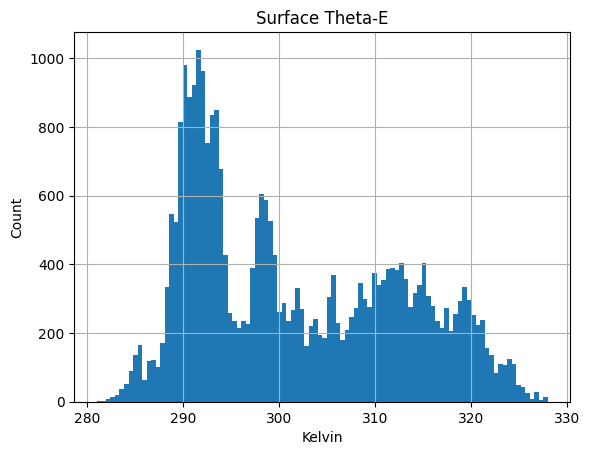

In [18]:
surface_theta_e_arr = np.array(df_non_zero["surface_theta_e"])
random.shuffle(surface_theta_e_arr)


plt.xlabel("Kelvin")
plt.ylabel("Count")
plt.grid()
plt.title("Surface Theta-E")
plt.hist(surface_theta_e_arr[:30000], bins=100);

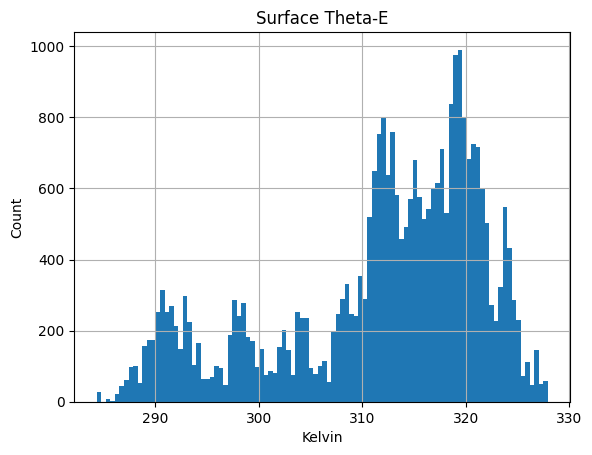

In [19]:
# where bias > 0.25 in

bias = (df_non_zero["mrms_q3evap_qpe"] - df_non_zero["gauge_acc_in"])
mask = ~(bias < 0.1) & (bias > -0.1)

surface_theta_e_arr = np.array(df_non_zero[mask]["surface_theta_e"])
random.shuffle(surface_theta_e_arr)


plt.xlabel("Kelvin")
plt.ylabel("Count")
plt.grid()
plt.title("Surface Theta-E")
plt.hist(surface_theta_e_arr[:30000], bins=100);

### bias measurements

$$
\text{Bias} (Z) = 100 \frac{ZR - m}{m} 
$$
- $ZR$: deterministic MRMS QPE reflectivity
    - $f(Z) \mapsto R$
- $m$: "conditional mean of the reference distribution"
- Source (Kirstetter Et. al 2015): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014WR015672

$$
\text{Bias}(Z) = 100 \frac{ZR - m}{m}
$$

- The only difference in our case is the values of $m$ are supplied by CCRFCD

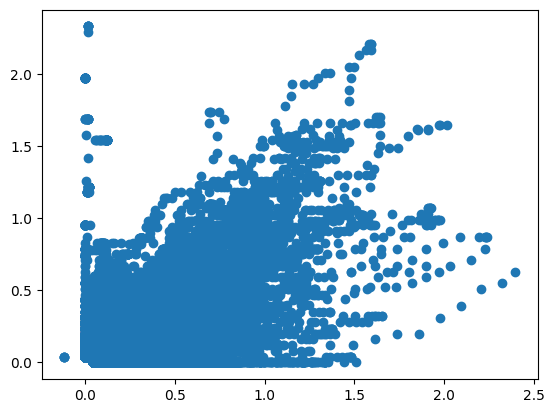

In [ ]:
ZR  = df_non_zero["mrms_q3evap_qpe"]
ref = df_non_zero["gauge_acc_in"]

# want to calculate m
plt.scatter(ZR, ref);

In [59]:
df_non_zero["gauge_acc_in_round"] = df_non_zero["gauge_acc_in"].apply(lambda x: round(x, 1))

/tmp/ipykernel_1532735/3526360506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero["gauge_acc_in_round"] = df_non_zero["gauge_acc_in"].apply(lambda x: round(x, 1))


In [74]:
df_non_zero[["gauge_acc_in_round","mrms_q3evap_qpe"]].groupby("gauge_acc_in_round").count()[:100]

/tmp/ipykernel_1532735/3274858512.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_non_zero[["gauge_acc_in_round","mrms_q3evap_qpe"]].groupby("gauge_acc_in_round").count()[:100]


,mrms_q3evap_qpe
gauge_acc_in_round,
0.0,266932
0.1,85835
0.2,20915
0.3,4251
0.4,3069
0.5,1687
0.6,1011
0.7,583
0.8,467


In [109]:
N_GROUPS = 2000

subset = df_non_zero[["gauge_acc_in","mrms_q3evap_qpe"]]
subset["group"] = pd.qcut(subset["gauge_acc_in"], q=N_GROUPS, labels=False, duplicates='drop')
subset.groupby("group").quantile(.75)

/tmp/ipykernel_1532735/197310227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["group"] = pd.qcut(subset["gauge_acc_in"], q=N_GROUPS, labels=False, duplicates='drop')


,gauge_acc_in,mrms_q3evap_qpe
group,,
0,0.00,0.086614
1,0.03,0.090551
3,0.03,0.122047
4,0.03,0.090551
5,0.03,0.118110
...,...,...
132,0.95,0.973425
133,1.02,1.253937
134,1.10,1.118110


Line of best fit: y = -17.1541x + 13.7607


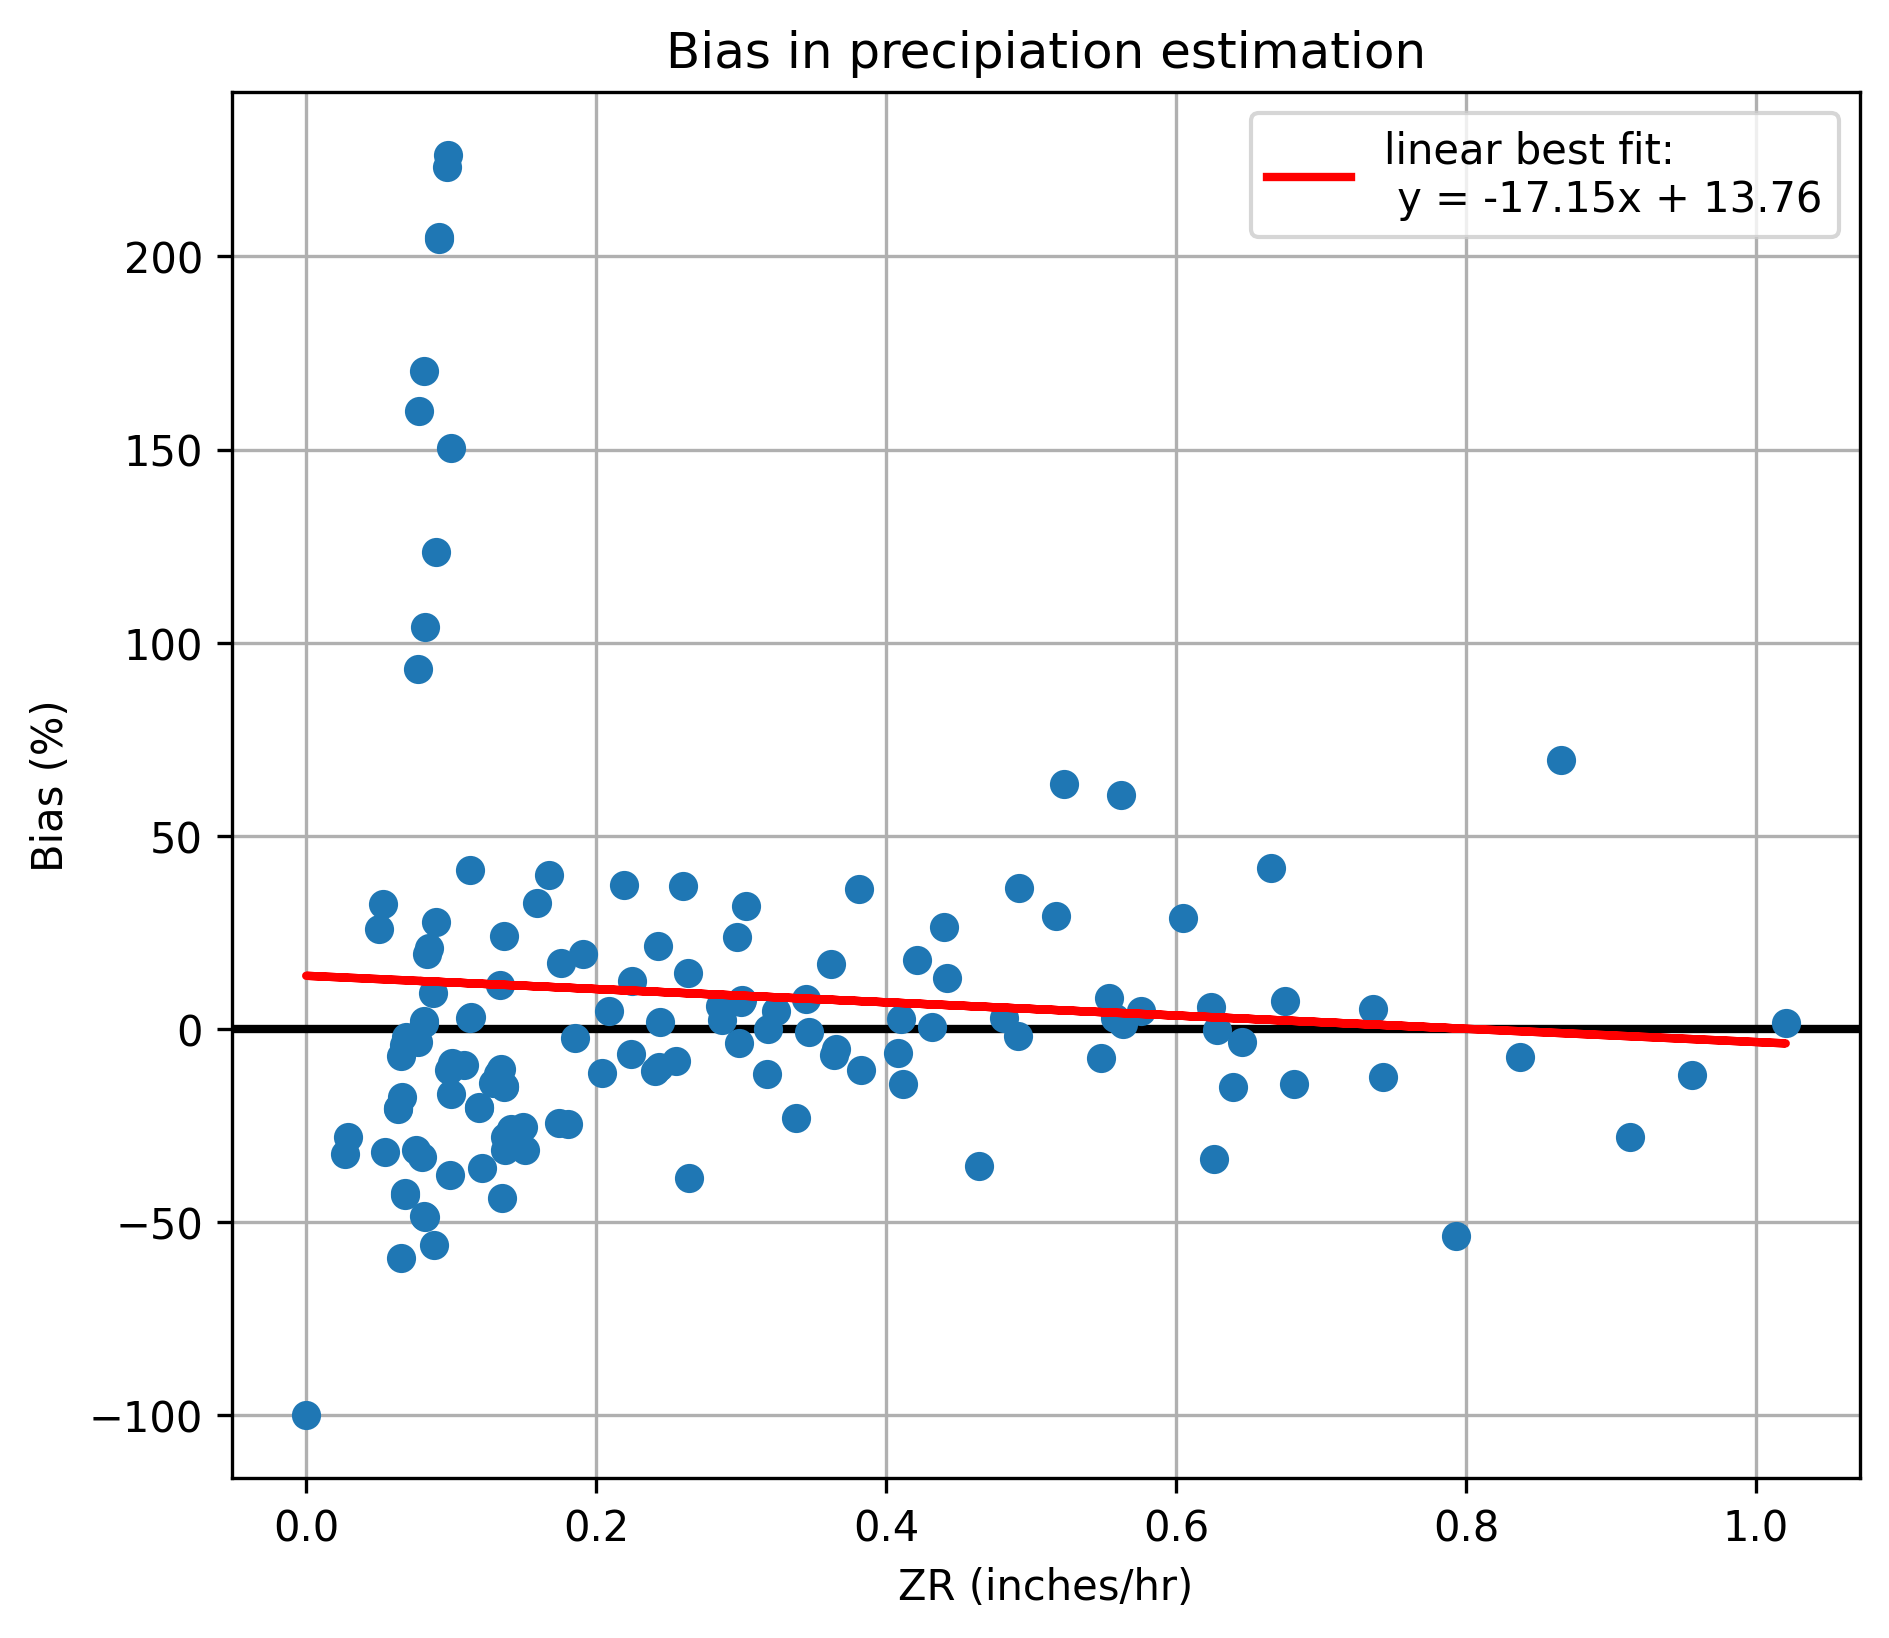

In [114]:
bias_df = subset.groupby("group").mean()

# note: index by [1: ] to avoid DB0
m      = np.array(bias_df["gauge_acc_in"])[1:]
ZR     = np.array(bias_df["mrms_q3evap_qpe"])[1:]
bias_z = np.array(100 * ((ZR - m) / m))

slope, intercept = np.polyfit(ZR, bias_z, 1)
fit_line = slope * ZR + intercept

fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

ax.axhline(y=0.0, color='black', linewidth=2)
ax.scatter(ZR, bias_z, zorder=3)
ax.plot(ZR, fit_line, color='red', linewidth=2,
        label=f'linear best fit:\n y = {slope:.2f}x + {intercept:.2f}', zorder=4)

# ax.set_ylim(-75, 75)

ax.set_title("Bias in precipiation estimation")
ax.set_xlabel("ZR (inches/hr)")
ax.set_ylabel("Bias (%)")
ax.grid(True)
ax.legend()

print(f"Line of best fit: y = {slope:.4f}x + {intercept:.4f}")

/tmp/ipykernel_1532735/1063772773.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Line of best fit: y = -17.1541x + 13.7607


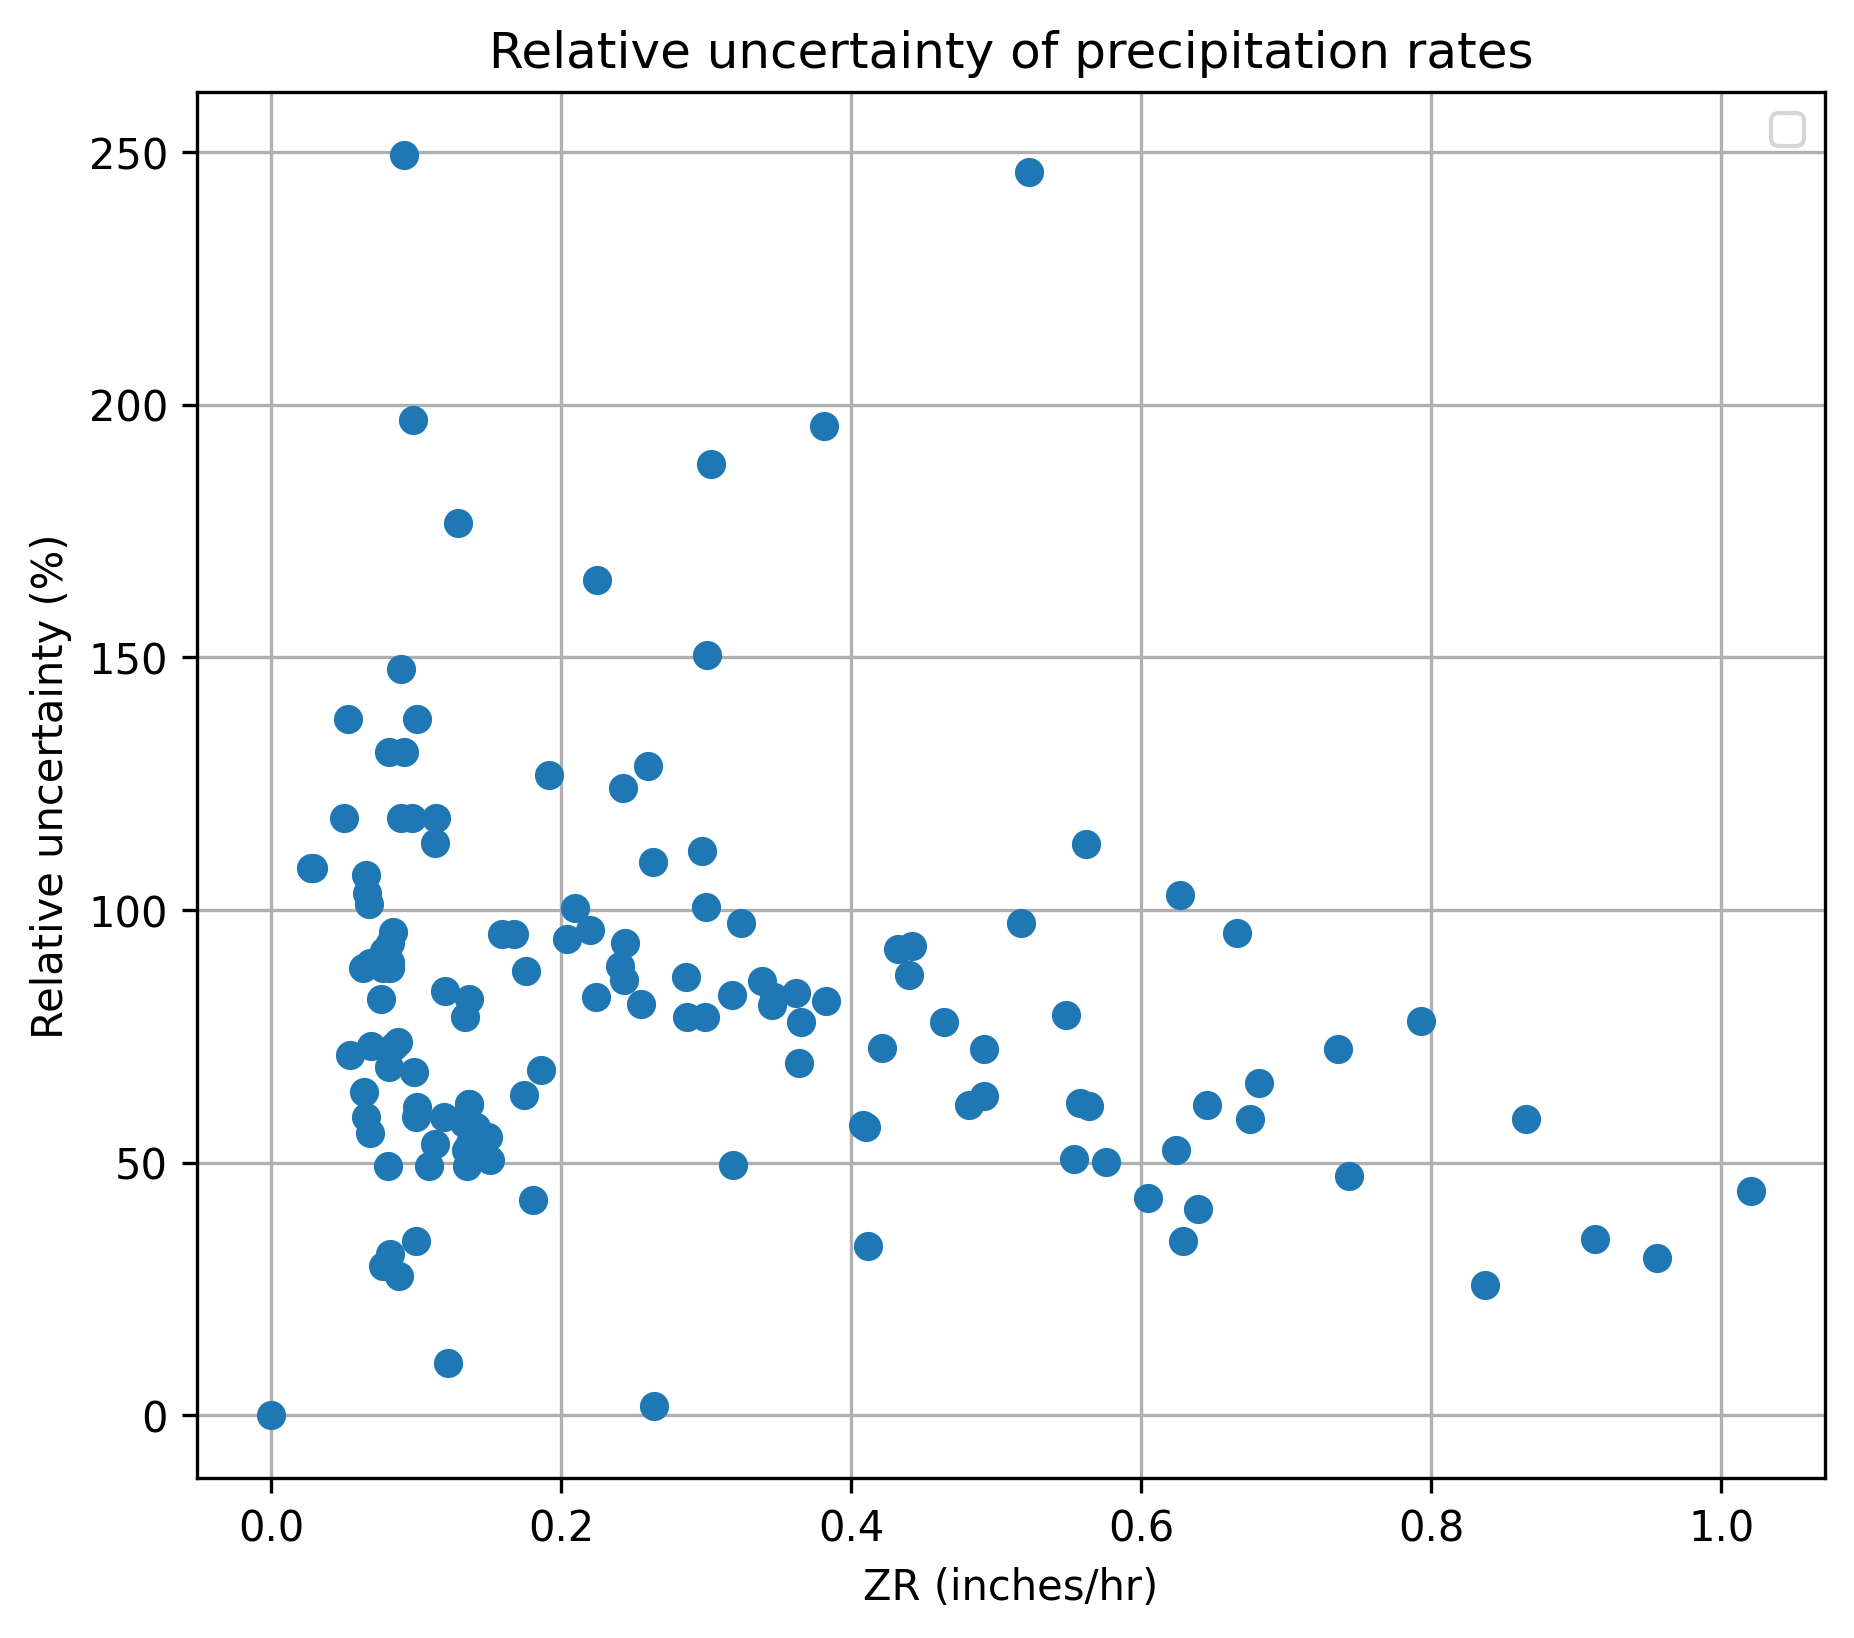

In [115]:
bias_df = subset.groupby("group").mean()

# note: index by [1: ] to avoid DB0
m             = np.array(bias_df["gauge_acc_in"])[1:]
Q_25          = np.array(subset.groupby("group").quantile(.25)["mrms_q3evap_qpe"])[1:]
Q_75          = np.array(subset.groupby("group").quantile(.75)["mrms_q3evap_qpe"])[1:]
uncertainty_z = np.array(100 * ((Q_75 - Q_25) / m))

# slope, intercept = np.polyfit(ZR, bias_z, 1)
# fit_line = slope * ZR + intercept

fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

# ax.axhline(y=0.0, color='black', linewidth=2)
ax.scatter(ZR, uncertainty_z, zorder=3)

# ax.plot(ZR, fit_line, color='red', linewidth=2,
#         label=f'linear best fit:\n y = {slope:.2f}x + {intercept:.2f}', zorder=4)
# ax.set_ylim(-75, 75)

ax.set_xlabel("ZR (inches/hr)")
ax.set_ylabel("Relative uncertainty (%)")

ax.set_title("Relative uncertainty of precipitation rates")
ax.grid(True)
ax.legend()

print(f"Line of best fit: y = {slope:.4f}x + {intercept:.4f}")